# J-Quants API Quick Startガイド

In [4]:
#@title 初期設定＆各種import
#@markdown ←にある▶ボタンを押すとGoogle Colabでコードを実行することができます。

#@markdown まずはこちらのコードを実行し、J-Quants APIを利用するため必要なパッケージをimportしましょう。

import json
import sys
import requests

from IPython.display import display
import pandas as pd

pd.set_option("display.max_columns", None)

API_URL = "https://api.jquants.com"

## Step1：API利用開始までの流れ　※初回のみ実施

J-Quants APIのご利用を検討いただき、ありがとうございます。

**J-Quants APIをご利用いただくには、以下の2つを事前に行っていただく必要がございます。**
 1. [J-Quants Webサイト](https://jpx-jquants.com/)への登録
 2. J-Quants API利用のためのプラン（Free, Light, Standard, Premium）選択

まだ、ご登録もしくはプラン選択がお済みでない方は、まず上記の2項目を行っていただきますようお願いいたします。  
より具体的な手順は[こちら](https://jpx.gitbook.io/j-quants-ja/outline/getstarted)をご参照ください。

##Step2及びStep3：リフレッシュトークン取得 & idToken取得
リフレッシュトークンを取得するには2つの方法があります。
1. J-Quants Webサイトへログインし、リフレッシュトークンを取得するボタンからリフレッシュトークンを取得する方法
2. リフレッシュトークン取得APIを利用し、リフレッシュトークンを取得する方法

以下に記載のどちらかお好みの方法でリフレッシュトークン及びidTokenを取得してください。

In [5]:
#@title **1.J-Quants Webサイトから取得したリフレッシュトークンを貼り付ける場合**
#@markdown J-Quants Webサイトにて取得したリフレッシュトークンを以下の「ここにtextを挿入」の箇所に貼り付けてください。

refreshtoken = "eyJjdHkiOiJKV1QiLCJlbmMiOiJBMjU2R0NNIiwiYWxnIjoiUlNBLU9BRVAifQ.MNGQkpqi6oR5I4OBWSs-J0F3jEPOQDhTApZnTe8n54RCVEC4YySL_fFfQ7kyPGMKq7K5XESJBgjfOq95dA8ASgsgDuqD4xR_FhgIjQwPVuGPx5w7mA-qRFQv8ywURg3TdTSHI6Q5H_LtOPW6SI1_qjWY8kN3hAdyuZK6Gt4MtXO-zDD7b60KC_xQw-uuyQbXqhqbWX0ESqiYZ6-2_Ilu_GGNq7mFMpTroMSaOfqZURPXKUMWaRuwgtUMPZuinjToArcUeZ4ZFACDqjqCq1iFK6coVVqQ1cV_WSuJX3Z7aumTV06dfOlscs9WHdd9192deOAPpScDphaxUjd3PpsvNQ.egagmb24owuZeR_r.eV1bkAFNQz2LjskLlKhjoCfNyp-5iqifP21BPeo8nf9UODnixonwIUUVK1zKlc873SfJjuz0fecqUXDGwgZBu_Ro13m5hB8n6lKLM4T1gfm-rJJJlDshrvPiZlekxr7ZRAWVZBjvQvWgsTuvj0RMEsNomHMUOi6kJ4PnQhNczK7TNyrlzJFRWvl3redENdeabbBezaYA8A3vord9FFbobamKJqpxCSaKVqaHtDyKA4zDUJe1jgYNO-Ubx0vWF5GPe-jw7N9f-5x0kFKkf1EYjaBAhmnItRjgACfrhIcuXdysLUMTJZoKo3iGCV197a1-A5fitYcAR80K4X2lx9EqgiDkwyFxGiELo_OwYlKo_oEIxK9We3obwDKGQKdGgcM135W4ntmSn1hP2gbGRvLrIdj3v1sdlBHwBKsyMWjlSQg71yJkb0oauqrkhYFJKaCUBTDE1aY9De6r1dwiHjX8QlTbrMdlnUllJKFlvCLKOZDGRGtmBcgBrx9Qkb3JPuACTUvXIr16P5dXN6BEtJdKWK5jY1v2xjEwv5nyS_wJ4w7Miws_-rx_ByHUfMQTUMOPZdj-bkqwGoNIPE-UusW63d4iPwB6iTSL7W6GuVovcDHWzsnNE3eyyz-aSSoBDC6q_TFWA45o3ba2dgHh5krnvQmNL-x6pr27XZyPvgMiBZVzAF9-VW7Jdztrw_CLY_snbThkREK7nPxlZ0h1AN3DDVuP8w01TOc9g7LdDuuihTj3hQiL62dQ5Zock7P9bbDr0ivcaidu0PTHhpPtNWfyjyEyRDJNJtA_tdOV6NSaqneUT1Hd8Q7tpbMCRpw0Rifdak6zOXaTW_Sx1xF2NIRThwjkaZKTY4epCVcN25vm1tPqYWW0USY24jblamEKZeuq-F1u0tHAQ45vCT2dVpZPpslbSNtCyWU0NPts2uSJqzHJ_y510eZ2RlYIu8DwRg43TX45r20iebFuhu0cg3DQ9ycMId_pw3X93lXC9KdL1ZEvusN9vUz6-1fsbTawdcxAwl2MHK7uFcpsHvATOg4Zi_yLOMjtk75YzqH5FFZUT0pAMGUIb9MRreRZA02E5E7JiC16WjZ2soRuabVK1p101w5Oik372zo8vFbT4m2Uxg_e27xj_H0FHKgTCciQyDh8nZyCJkrdw6tu4kH07tB3321J94dnXD-3C2moZBnEtrJhAxMWb_otcTMsf8O46azM9YNSXzNJfJyqf8sJhZ3yo-MXcM5UVqy_Ra3OnsxdEZZSuIdi5oAoKxdkfHkjFzEptds-oRvwSYBE2RZiUwIJjY-jrRoVz0qLiwK9FOXri3NfYzpICFKMWOKm919M-qUsEEYdzy3DEv0NaQ.D_3zlCkOd3kwOQxPOG_xkw"#@param {type: "string"}

# idToken取得
res = requests.post(f"{API_URL}/v1/token/auth_refresh?refreshtoken={refreshtoken}")
if res.status_code == 200:
    id_token = res.json()['idToken']
    headers = {'Authorization': 'Bearer {}'.format(id_token)}
    display("idTokenの取得に成功しました。")
else:
    display(res.json()["message"])


#@markdown 上記コードを実行し、**「idTokenの取得に成功しました。」**と表示されれば、J-Quants APIを利用するための準備は完了です。

#@markdown なお、 「Your refresh token may be incorrect or expired.」等のエラーが出力されている場合は、上記で貼り付けたリフレッシュトークンが誤っているか、期限が切れている可能性がございます。

#@markdown その場合はお手数ですが、再度リフレッシュトークンをJ-Quants Webサイトから取得いただき、再度実行してください。


'idTokenの取得に成功しました。'

###**2. J-Quants Webサイトに登録したID及びPWを使用し、RefreshToken及びidTokenをAPIを利用して取得する場合**

In [6]:
#@title Google Driveのマウント

#@markdown 登録いただいたIDやPWを直接本Notebookに記載するのはセキュリティ上適切ではない可能性があるため、<br>
#@markdown Google Driveに設定ファイルを作成し、当該設定ファイルにIDやPWを記載することをおすすめします。

#@markdown 本コードを実行し、まずはGoogle Driveをマウントします。


from google.colab import drive

try:
    drive.mount('/content/drive')
except:
    print("Google Driveのマウントに失敗しました。")
else:
    print("Google Driveのマウントに成功しました。")

Mounted at /content/drive
Google Driveのマウントに成功しました。


#### 設定ファイルの作成（初回のみ）
- 以下の画像のように 「drive→MyDrive→drive_ws→secret→jquants-api.toml」といった階層で設定ファイルを作成します。

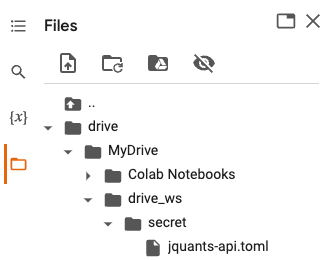

- 作成したtomlファイルに以下のサンプルのとおりID及びパスワードを記載します。  
(なお、\*の箇所はご登録いただいたID及びPWに置き換えてください。)

```
[jquants-api-client]
mailaddress = "*****@***.***"
password = "**************"
```

In [7]:
#@title 作成した設定ファイルを読み込み、リフレッシュトークン及びidTokenを取得
#@markdown 正しく設定ファイルが作成されていれば、本コードを実行することで、idTokenを取得することができます。
#@markdown 「APIを使用する準備が完了しました。」と出力されれば、されれば、J-Quants APIをコールすることができるようになります！

if sys.version_info >= (3, 11):
    import tomllib
else:
    import tomli as tomllib

config_path = ("/content/drive/MyDrive/drive_ws/secret/jquants-api.toml")

with open(config_path, mode="rb") as f:
    ret = tomllib.load(f)["jquants-api-client"]

USER_DATA = {k: v for k, v in ret.items()}

# refresh token取得
try:
  res = requests.post(f"{API_URL}/v1/token/auth_user", data=json.dumps(USER_DATA))
  refresh_token = res.json()['refreshToken']
except:
  print("RefreshTokenの取得に失敗しました。")
else:
  # id token取得
  try:
    res = requests.post(f"{API_URL}/v1/token/auth_refresh?refreshtoken={refresh_token}")
    id_token = res.json()['idToken']
  except:
    print("idTokenの取得に失敗しました。")
  else:
    headers = {'Authorization': 'Bearer {}'.format(id_token)}
    print("API使用の準備が完了しました。")

API使用の準備が完了しました。


## Step4：取得したIDトークンを用いて各APIをご利用ください。

### Freeプラン以上のプランで利用できるAPI
- 上場銘柄一覧（/listed/info）
- 株価四本値*（/prices/daily_quotes）
- 財務情報/fins/statements)
- 決算発表予定日（/fins/announcement）
- 取引カレンダー（/markets/trading_calendar）

\* プレミアムプランのユーザのみ、前後場の四本値及び取引高・取引代金の情報が取得可能


In [8]:
#@title 上場銘柄一覧（/listed/info）

#@markdown - 過去時点での銘柄情報、当日の銘柄情報および翌営業日時点の銘柄情報が取得可能です。
#@markdown - データの取得では、銘柄コード（code）または日付（date）の指定が可能です。

#@markdown （データ更新時刻）
#@markdown - 毎営業日の24:00頃

code = ""#@param {type:"string"}
date = "2025-05-02"#@param {type:"string"}

params = {}
if code != "":
  params["code"] = code
if date != "":
  params["date"] = date

res = requests.get(f"{API_URL}/v1/listed/info", params=params, headers=headers)

if res.status_code == 200:
  d = res.json()
  data = d["info"]
  while "pagination_key" in d:
    params["pagination_key"] = d["pagination_key"]
    res = requests.get(f"{API_URL}/v1/listed/info", params=params, headers=headers)
    d = res.json()
    data += d["info"]
  df = pd.DataFrame(data)
  display(df)
else:
  print(res.json())

,Date,Code,CompanyName,CompanyNameEnglish,Sector17Code,Sector17CodeName,Sector33Code,Sector33CodeName,ScaleCategory,MarketCode,MarketCodeName,MarginCode,MarginCodeName
0,2025-05-02,13010,極洋,"KYOKUYO CO.,LTD.",1,食品,0050,水産・農林業,TOPIX Small 2,0111,プライム,2,貸借
1,2025-05-02,13050,大和アセットマネジメント株式会社 ｉＦｒｅｅＥＴＦ ＴＯＰＩＸ（年１回決算型）,iFreeETF TOPIX (Yearly Dividend Type),99,その他,9999,その他,-,0109,その他,2,貸借
2,2025-05-02,13060,野村アセットマネジメント株式会社 ＮＥＸＴ ＦＵＮＤＳ ＴＯＰＩＸ連動型上場投信,NEXT FUNDS TOPIX Exchange Traded Fund,99,その他,9999,その他,-,0109,その他,2,貸借
3,2025-05-02,13080,日興アセットマネジメント株式会社 上場インデックスファンドＴＯＰＩＸ,Listed Index Fund TOPIX,99,その他,9999,その他,-,0109,その他,2,貸借
4,2025-05-02,13090,野村アセットマネジメント株式会社 ＮＥＸＴ ＦＵＮＤＳ ＣｈｉｎａＡＭＣ・中国株式・上証５０...,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,99,その他,9999,その他,-,0109,その他,2,貸借
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,2025-05-02,99910,ジェコス,GECOSS CORPORATION,13,商社・卸売,6050,卸売業,TOPIX Small 2,0111,プライム,2,貸借
4411,2025-05-02,99930,ヤマザワ,"YAMAZAWA CO.,LTD.",14,小売,6100,小売業,-,0112,スタンダード,1,信用
4412,2025-05-02,99940,やまや,YAMAYA CORPORATION,14,小売,6100,小売業,-,0112,スタンダード,2,貸借
4413,2025-05-02,99960,サトー商会,"Satoh&Co.,Ltd.",13,商社・卸売,6050,卸売業,-,0112,スタンダード,2,貸借


In [10]:
# prompt: DataFrame df を使用: save

# Assuming you want to save the dataframe to a CSV file named 'df_saved.csv'
df.to_csv('df_saved.csv', index=False) # Set index=False to avoid saving row indices


In [8]:
#@title 株価四本値（/prices/daily_quotes）

#@markdown - 株価は分割・併合を考慮した調整済み株価（小数点第２位四捨五入）と調整前の株価を取得することができます。
#@markdown - データの取得では、銘柄コード（code）または日付（date）の指定が必須となります。

#@markdown （データ更新時刻）
#@markdown - 毎営業日の17:00頃

#@markdown - Premiumプランの方には、日通しに加え、前場(Morning)及び後場(Afternoon)の四本値及び取引高（調整前・後両方）・取引代金が取得可能です。


code = "338A"#@param {type:"string"}
date = "2025-05-02"#@param {type:"string"}
from_ = "" #@param {type:"string"}
to = "" #@param {type:"string"}

params = {}
if code != "":
  params["code"] = code
if date != "":
  params["date"] = date
if from_ != "":
  params["from"] = from_
if to != "":
  params["to"] = to

res = requests.get(f"{API_URL}/v1/prices/daily_quotes", params=params, headers=headers)

if res.status_code == 200:
  d = res.json()
  data = d["daily_quotes"]
  while "pagination_key" in d:
    params["pagination_key"] = d["pagination_key"]
    res = requests.get(f"{API_URL}/v1/prices/daily_quotes", params=params, headers=headers)
    d = res.json()
    data += d["daily_quotes"]
  df = pd.DataFrame(data)
  display(df)
else:
  print(res.json())

,Date,Code,Open,High,Low,Close,UpperLimit,LowerLimit,Volume,TurnoverValue,AdjustmentFactor,AdjustmentOpen,AdjustmentHigh,AdjustmentLow,AdjustmentClose,AdjustmentVolume
0,2025-05-02,338A0,11100.0,11390.0,10460.0,10550.0,0,0,238400.0,2.587017e+09,1.0,11100.0,11390.0,10460.0,10550.0,238400.0


In [11]:
#@title 財務情報（/fins/statements）

#@markdown - 財務情報APIでは、上場企業がTDnetへ提出する決算短信Summary等を基に作成された、四半期毎の財務情報を取得することができます。
#@markdown - データの取得では、銘柄コード（code）または開示日（date）の指定が必須です。

#@markdown （データ更新時刻）
#@markdown - 速報18:00頃、確報24:30頃


code = "4063"#@param {type:"string"}
date = ""#@param {type:"string"}

params = {}
if code != "":
  params["code"] = code
if date != "":
  params["date"] = date

res = requests.get(f"{API_URL}/v1/fins/statements", params=params, headers=headers)

if res.status_code == 200:
  d = res.json()
  data = d["statements"]
  while "pagination_key" in d:
    params["pagination_key"] = d["pagination_key"]
    res = requests.get(f"{API_URL}/v1/fins/statements", params=params, headers=headers)
    d = res.json()
    data += d["statements"]
  df = pd.DataFrame(data)
  display(df)
else:
  print(res.json())

,DisclosedDate,DisclosedTime,LocalCode,DisclosureNumber,TypeOfDocument,TypeOfCurrentPeriod,CurrentPeriodStartDate,CurrentPeriodEndDate,CurrentFiscalYearStartDate,CurrentFiscalYearEndDate,NextFiscalYearStartDate,NextFiscalYearEndDate,NetSales,OperatingProfit,OrdinaryProfit,Profit,EarningsPerShare,DilutedEarningsPerShare,TotalAssets,Equity,EquityToAssetRatio,BookValuePerShare,CashFlowsFromOperatingActivities,CashFlowsFromInvestingActivities,CashFlowsFromFinancingActivities,CashAndEquivalents,ResultDividendPerShare1stQuarter,ResultDividendPerShare2ndQuarter,ResultDividendPerShare3rdQuarter,ResultDividendPerShareFiscalYearEnd,ResultDividendPerShareAnnual,DistributionsPerUnit(REIT),ResultTotalDividendPaidAnnual,ResultPayoutRatioAnnual,ForecastDividendPerShare1stQuarter,ForecastDividendPerShare2ndQuarter,ForecastDividendPerShare3rdQuarter,ForecastDividendPerShareFiscalYearEnd,ForecastDividendPerShareAnnual,ForecastDistributionsPerUnit(REIT),ForecastTotalDividendPaidAnnual,ForecastPayoutRatioAnnual,NextYearForecastDividendPerShare1stQuarter,NextYearForecastDividendPerShare2ndQuarter,NextYearForecastDividendPerShare3rdQuarter,NextYearForecastDividendPerShareFiscalYearEnd,NextYearForecastDividendPerShareAnnual,NextYearForecastDistributionsPerUnit(REIT),NextYearForecastPayoutRatioAnnual,ForecastNetSales2ndQuarter,ForecastOperatingProfit2ndQuarter,ForecastOrdinaryProfit2ndQuarter,ForecastProfit2ndQuarter,ForecastEarningsPerShare2ndQuarter,NextYearForecastNetSales2ndQuarter,NextYearForecastOperatingProfit2ndQuarter,NextYearForecastOrdinaryProfit2ndQuarter,NextYearForecastProfit2ndQuarter,NextYearForecastEarningsPerShare2ndQuarter,ForecastNetSales,ForecastOperatingProfit,ForecastOrdinaryProfit,ForecastProfit,ForecastEarningsPerShare,NextYearForecastNetSales,NextYearForecastOperatingProfit,NextYearForecastOrdinaryProfit,NextYearForecastProfit,NextYearForecastEarningsPerShare,MaterialChangesInSubsidiaries,SignificantChangesInTheScopeOfConsolidation,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares,NonConsolidatedNetSales,NonConsolidatedOperatingProfit,NonConsolidatedOrdinaryProfit,NonConsolidatedProfit,NonConsolidatedEarningsPerShare,NonConsolidatedTotalAssets,NonConsolidatedEquity,NonConsolidatedEquityToAssetRatio,NonConsolidatedBookValuePerShare,ForecastNonConsolidatedNetSales2ndQuarter,ForecastNonConsolidatedOperatingProfit2ndQuarter,ForecastNonConsolidatedOrdinaryProfit2ndQuarter,ForecastNonConsolidatedProfit2ndQuarter,ForecastNonConsolidatedEarningsPerShare2ndQuarter,NextYearForecastNonConsolidatedNetSales2ndQuarter,NextYearForecastNonConsolidatedOperatingProfit2ndQuarter,NextYearForecastNonConsolidatedOrdinaryProfit2ndQuarter,NextYearForecastNonConsolidatedProfit2ndQuarter,NextYearForecastNonConsolidatedEarningsPerShare2ndQuarter,ForecastNonConsolidatedNetSales,ForecastNonConsolidatedOperatingProfit,ForecastNonConsolidatedOrdinaryProfit,ForecastNonConsolidatedProfit,ForecastNonConsolidatedEarningsPerShare,NextYearForecastNonConsolidatedNetSales,NextYearForecastNonConsolidatedOperatingProfit,NextYearForecastNonConsolidatedOrdinaryProfit,NextYearForecastNonConsolidatedProfit,NextYearForecastNonConsolidatedEarningsPerShare
0,2015-07-23,15:00,40630,20150717453348,1QFinancialStatements_Consolidated_JP,1Q,2015-04-01,2015-06-30,2015-04-01,2016-03-31,,,314043000000,51410000000,55008000000,37630000000,88.35,88.34,2415490000000,2013193000000,0.812,4604.15,,,,,,,,,,,,,,55.0,,55.0,110.0,,,,,,,,,,,635000000000,102000000000,110000000000,72000000000,169.05,,,,,,1270000000000,197000000000,210000000000,140000000000,328.71,,,,,,false,,true,false,false,false,432106693,6200578,425905586,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2015-10-27,15:00,40630,20151027426106,2QFinancialStatements_Consolidated_JP,2Q,2015-04-01,2015-09-

In [12]:
#@title 決算発表予定日（/fins/announcemnet）

#@markdown （データ更新時刻）
#@markdown - 不定期（更新がある日は）19:00頃

#@markdown - [当該ページ](https://www.jpx.co.jp/listing/event-schedules/financial-announcement/index.html)で、3月期・９月期決算会社分に更新があった場合のみ19時ごろに更新されます。

params = {}

res = requests.get(f"{API_URL}/v1/fins/announcement", params=params, headers=headers)

if res.status_code == 200:
  d = res.json()
  data = d["announcement"]
  while "pagination_key" in d:
    params["pagination_key"] = d["pagination_key"]
    res = requests.get(f"{API_URL}/v1/fins/announcement", params=params, headers=headers)
    d = res.json()
    data += d["announcement"]
  df = pd.DataFrame(data)
  display(df)
else:
  print(res.json())

,Date,Code,CompanyName,FiscalYear,SectorName,FiscalQuarter,Section
0,2025-05-07,73660,ＬＩＴＡＬＩＣＯ,3月31日,サービス業,本決算,プライム
1,2025-05-07,36900,イルグルム,9月30日,情報・通信業,第２四半期,グロース
2,2025-05-07,93240,安田倉庫,3月31日,倉庫・運輸関連業,本決算,プライム
3,2025-05-07,18700,矢作建設工業,3月31日,建設業,本決算,プライム
4,2025-05-07,54450,東京鐵鋼,3月31日,鉄鋼,本決算,プライム
5,2025-05-07,31320,マクニカホールディングス,3月31日,卸売業,本決算,プライム
6,2025-05-07,52080,有沢製作所,3月31日,化学,本決算,プライム
7,2025-05-07,81180,キング,3月31日,繊維製品,本決算,スタンダード
8,2025-05-07,74800,スズデン,3月31日,卸売業,本決算,スタンダード
9,2025-05-07,19670,ヤマト,3月20日,建設業,本決算,スタンダード


In [13]:
#@title 取引カレンダー（/market/trading_calendar）

#@markdown - 東証およびOSEにおける営業日、休業日、ならびにOSEにおける祝日取引の有無の情報を取得できます。
#@markdown - データの取得では、休日区分（holidaydivision）または日付（from/to）の指定が可能です。

#@markdown （データ更新日）
#@markdown - 不定期（原則として、毎年2月頃をめどに翌年1年間の営業日および祝日取引実施日（予定）を更新します。）


holidaydivision = ""#@param ["0", "1", "2", "3"]{allow-input:true}
from_ = "" #@param {type:"string"}
to = "" #@param {type:"string"}

params = {}
if holidaydivision != "":
  params["holidaydivision"] = holidaydivision
if from_ != "":
  params["from"] = from_
if to != "":
  params["to"] = to

res = requests.get(f"{API_URL}/v1/markets/trading_calendar", params=params, headers=headers)

if res.status_code == 200:
  d = res.json()
  data = d["trading_calendar"]
  while "pagination_key" in d:
    params["pagination_key"] = d["pagination_key"]
    res = requests.get(f"{API_URL}/v1/markets/trading_calendar", params=params, headers=headers)
    d = res.json()
    data += d["trading_calendar"]
  df = pd.DataFrame(data)
  display(df)
else:
  print(res.json())

,Date,HolidayDivision
0,2015-05-07,1
1,2015-05-08,1
2,2015-05-09,0
3,2015-05-10,0
4,2015-05-11,1
...,...,...
4252,2026-12-27,0
4253,2026-12-28,1
4254,2026-12-29,1
4255,2026-12-30,1


### Lightプラン以上のプランで利用できるAPI
- 投資部門別情報（/markets/trades_spec）
- TOPIX四本値（/indices/topix）

In [14]:
#@title 投資部門別（株式）データ（/markets/trades_spec）

#@markdown - 投資部門別売買状況（金額）のデータを取得することができます。
#@markdown - 投資部門別売買状況は、個人・外国人・金融機関など、投資家ごとの売買動向をまとめた情報です。
#@markdown - 基本的には[こちら](https://www.jpx.co.jp/markets/statistics-equities/investor-type/index.html)のページで掲載しているものと同等のものになります。
#@markdown - データの取得では、セクション（section）または日付（from/to）の指定が可能です。

#@markdown （データ更新時刻）
#@markdown - 原則、毎週第４営業日18:00頃


section = ""#@param ["TSE1st", "TSE2nd", "TSEMothers", "TSEJASDAQ", "TSEPrime", "TSEStandard", "TSEGrowth", "TokyoNagoya"] {allow-input: true}
from_ = "" #@param {type:"string"}
to = "" #@param {type:"string"}

params = {}
if section != "":
  params["section"] = section
if from_ != "":
  params["from"] = from_
if to != "":
  params["to"] = to

res = requests.get(f"{API_URL}/v1/markets/trades_spec", params=params, headers=headers)

if res.status_code == 200:
  d = res.json()
  data = d["trades_spec"]
  while "pagination_key" in d:
    params["pagination_key"] = d["pagination_key"]
    res = requests.get(f"{API_URL}/v1/markets/trades_spec", params=params, headers=headers)
    d = res.json()
    data += d["trades_spec"]
  df = pd.DataFrame(data)
  display(df)
else:
  print(res.json())


,PublishedDate,StartDate,EndDate,Section,ProprietarySales,ProprietaryPurchases,ProprietaryTotal,ProprietaryBalance,BrokerageSales,BrokeragePurchases,BrokerageTotal,BrokerageBalance,TotalSales,TotalPurchases,TotalTotal,TotalBalance,IndividualsSales,IndividualsPurchases,IndividualsTotal,IndividualsBalance,ForeignersSales,ForeignersPurchases,ForeignersTotal,ForeignersBalance,SecuritiesCosSales,SecuritiesCosPurchases,SecuritiesCosTotal,SecuritiesCosBalance,InvestmentTrustsSales,InvestmentTrustsPurchases,InvestmentTrustsTotal,InvestmentTrustsBalance,BusinessCosSales,BusinessCosPurchases,BusinessCosTotal,BusinessCosBalance,OtherCosSales,OtherCosPurchases,OtherCosTotal,OtherCosBalance,InsuranceCosSales,InsuranceCosPurchases,InsuranceCosTotal,InsuranceCosBalance,CityBKsRegionalBKsEtcSales,CityBKsRegionalBKsEtcPurchases,CityBKsRegionalBKsEtcTotal,CityBKsRegionalBKsEtcBalance,TrustBanksSales,TrustBanksPurchases,TrustBanksTotal,TrustBanksBalance,OtherFinancialInstitutionsSales,OtherFinancialInstitutionsPurchases,OtherFinancialInstitutionsTotal,OtherFinancialInstitutionsBalance
0,2015-05-12,2015-04-27,2015-05-01,TokyoNagoya,1.537344e+09,1.570224e+09,3.107568e+09,32879683.0,1.117891e+10,1.114892e+10,2.232783e+10,-29987970.0,1.271625e+10,1.271914e+10,2.543539e+10,2891713.0,2.588618e+09,2.670769e+09,5.259387e+09,82151590.0,7.628059e+09,7.570662e+09,1.519872e+10,-57396572.0,155460053.0,158603026.0,314063079.0,3142973.0,272452076.0,222145478.0,494597554.0,-50306598.0,104498173.0,97678123.0,202176296.0,-6820050.0,18234277.0,27421000.0,45655277.0,9186723.0,20204157.0,17342375.0,37546532.0,-2861782.0,6138448.0,12937198.0,19075646.0,6798750.0,361325903.0,346362169.0,7.076881e+08,-14963734.0,23917271.0,24998001.0,48915272.0,1080730.0
1,2015-05-12,2015-04-27,2015-05-01,TSEJASDAQ,6.406854e+06,4.876590e+06,1.128344e+07,-1530264.0,2.920387e+08,2.935781e+08,5.856168e+08,1539425.0,2.984456e+08,2.984547e+08,5.969003e+08,9161.0,2.091797e+08,2.107827e+08,4.199623e+08,1602982.0,6.372857e+07,6.504058e+07,1.287691e+08,1312009.0,10196914.0,10228466.0,20425380.0,31552.0,2146273.0,1910379.0,4056652.0,-235894.0,3805991.0,2828378.0,6634369.0,-977613.0,507377.0,838350.0,1345727.0,330973.0,18223.0,5780.0,24003.0,-12443.0,2622.0,64484.0,67106.0,61862.0,2430441.0,1836166.0,4.266607e+06,-594275.0,22631.0,42903.0,65534.0,20272.0
2,2015-05-12,2015-04-27,2015-05-01,TSE2nd,3.302936e+06,3.624233e+06,6.927169e+06,321297.0,1.141900e+08,1.136537e+08,2.278437e+08,-536302.0,1.174929e+08,1.172779e+08,2.347709e+08,-215005.0,7.642276e+07,8.076064e+07,1.571834e+08,4337877.0,2.839958e+07,2.245409e+07,5.085367e+07,-5945491.0,3980201.0,4061011.0,8041212.0,80810.0,1130257.0,1550283.0,2680540.0,420026.0,2303463.0,2747732.0,5051195.0,444269.0,265029.0,560308.0,825337.0,295279.0,12148.0,64788.0,76936.0,52640.0,13694.0,24968.0,38662.0,11274.0,1650796.0,1214694.0,2.865490e+06,-436102.0,12073.0,215189.0,227262.0,203116.0
3,2015-05-12,2015-04-27,2015-05-01,TSE1st,1.518903e+09,1.552622e+09,3.071525e+09,33719403.0,1.041789e+10,1.038719e+10,2.080509e+10,-30701167.0,1.193680e+10,1.193982e+10,2.387661e+10,3018236.0,2.039417e+09,2.110663e+09,4.150080e+09,71245266.0,7.469564e+09,7.417501e+09,1.488707e+10,-52063217.0,131461134.0,133702726.0,265163860.0,2241592.0,267048035.0,215970640.0,483018675.0,-51077395.0,92364168.0,88278252.0,180642420.0,-4085916.0,14050506.0,25393761.0,39444267.0,11343255.0,19753049.0,17270719.0,37023768.0,-2482330.0,6091106.0,12847698.0,18938804.0,6756592.0,354541623.0,340844124.0,6.953857e+08,-13697499.0,23603309.0,24721794.0,48325103.0,1118485.0
4,2015-05-12,2015-04-27,2015-05-01,TSEMothers,8.690504e+06,9.055887e+06,1.774639e+07,365383.0,3.526192e+08,3.522571e+08,7.048764e+08,-362087.0,3.613097e+08,3.613130e+08,7.226228e+08,3296.0,2.618460e+08,2.667482e+08,5.285943e+08,4902184.0,6.624051e+07,6.554119e+07,1.317817e+08,-699323.0,9687431.0,10462418.0,20149849.0,774987.0,2086187.0,2689175.0,4775362.0,602988.0,5971965.0,3801742.0,9773707.0,-2170223.0,3399835.0,561574.0,3961409.0,-2

In [ ]:
#@title TOPIX四本値（/indices/topix）

#@markdown - 日次のTOPIX指数の四本値について取得することができます。
#@markdown - 日付（from/to）の指定が可能です

#@markdown （データ更新時刻）
#@markdown - 毎営業日の16:30頃


date_from = ""#@param {type:"string"}
date_to = ""#@param {type:"string"}

params = {}

if date_from != "":
  params["from"] = date_from
if date_to != "":
  params["to"] = date_to

res = requests.get(f"{API_URL}/v1/indices/topix", params=params, headers=headers)

if res.status_code == 200:
  d = res.json()
  data = d["topix"]
  while "pagination_key" in d:
    params["pagination_key"] = d["pagination_key"]
    res = requests.get(f"{API_URL}/v1/indices/topix", params=params, headers=headers)
    d = res.json()
    data += d["topix"]
  df = pd.DataFrame(data)
  display(df)
else:
  print(res.json())


### Standard以上のプランで利用できるAPI
- 指数四本値（/indices）
- オプション四本値（/option/index_option）
- 信用取引週末残高（/markets/weekly_margin_interest）
- 業種別空売り比率（/markets/short_selling）

In [ ]:
#@title 指数四本値（/indices）

#@markdown - 日次の各種指数の四本値について取得することができます。
#@markdown - データの取得では、指数コード（code）または日付（date）の指定が必須となります。

#@markdown （データ更新時刻）
#@markdown - 毎営業日の16:30頃


code = ""#@param {type:"string"}
date = ""#@param {type:"string"}
from_ = "" #@param {type:"string"}
to = "" #@param {type:"string"}

params = {}
if code != "":
  params["code"] = code
if date != "":
  params["date"] = date
if from_ != "":
  params["from"] = from_
if to != "":
  params["to"] = to

res = requests.get(f"{API_URL}/v1/indices", params=params, headers=headers)

if res.status_code == 200:
  d = res.json()
  data = d["indices"]
  while "pagination_key" in d:
    params["pagination_key"] = d["pagination_key"]
    res = requests.get(f"{API_URL}/v1/indices", params=params, headers=headers)
    d = res.json()
    data += d["indices"]
  df = pd.DataFrame(data)
  display(df)
else:
  print(res.json())

In [ ]:
#@title オプション四本値（/option/index_option）

#@markdown - 日次の日経225指数オプションの四本値や売買高、清算値段等について取得することができます。
#@markdown - 日付（date）の指定が必須です

#@markdown （データ更新時刻）
#@markdown - 毎営業日の27:00頃


date = "" #@param {type:"string"}
params = {}
if date != "":
  params["date"] = date

res = requests.get(f"{API_URL}/v1/option/index_option", params=params, headers=headers)

if res.status_code == 200:
  d = res.json()
  data = d["index_option"]
  while "pagination_key" in d:
    params["pagination_key"] = d["pagination_key"]
    res = requests.get(f"{API_URL}/v1/option/index_option", params=params, headers=headers)
    d = res.json()
    data += d["index_option"]
  df = pd.DataFrame(data)
  display(df)
else:
  print(res.json())

In [ ]:
#@title 信用取引週末残高（/markets/weekly_margin_interest）

#@markdown - 制度・一般信用取引における各銘柄の前週末の残高についてデータを取得することができます。
#@markdown - 本データは[こちら](https://www.jpx.co.jp/markets/statistics-equities/margin/index.html)の個別銘柄信用取引残高表のデータをヒストリカルで提供するものになります。
#@markdown - 銘柄コード（code）もしくは日付（date）の指定が必須です。<br>
#@markdown （From, Toはcodeを入れている場合にのみ可能）

#@markdown （データ更新時刻）
#@markdown - 原則毎週第２営業日の16:30頃


code = ""#@param {type:"string"}
date = ""#@param {type:"string"}
from_ = "" #@param {type:"string"}
to = "" #@param {type:"string"}

params = {}
if code != "":
  params["code"] = code
if date != "":
  params["date"] = date
if from_ != "":
  params["from"] = from_
if to != "":
  params["to"] = to

res = requests.get(f"{API_URL}/v1/markets/weekly_margin_interest", params=params, headers=headers)

if res.status_code == 200:
  d = res.json()
  data = d["weekly_margin_interest"]
  while "pagination_key" in d:
    params["pagination_key"] = d["pagination_key"]
    res = requests.get(f"{API_URL}/v1/markets/weekly_margin_interest", params=params, headers=headers)
    d = res.json()
    data += d["weekly_margin_interest"]
  df = pd.DataFrame(data)
  display(df)
else:
  print(res.json())

In [ ]:
#@title 業種別空売り比率（/markets/short_selling）

#@markdown - 日次の３３業種別の空売りの売買代金について取得することができます。
#@markdown - ３３業種コード（sector33code）もしくは日付（date）の指定が必須です。<br>
#@markdown （From, Toは33SectorCodeを入れている場合にのみ可能）

#@markdown （データ更新時刻）
#@markdown - 毎営業日の17:00頃

#@markdown （その他留意点）
#@markdown - 業種コード9999は、ETFやREIT等の３３業種に含まれない銘柄のものになります。


sector33code = ""#@param {type:"string"}
date = ""#@param {type:"string"}
from_ = "" #@param {type:"string"}
to = "" #@param {type:"string"}

params = {}
if sector33code != "":
  params["sector33code"] = sector33code
if date != "":
  params["date"] = date
if from_ != "":
  params["from"] = from_
if to != "":
  params["to"] = to

res = requests.get(f"{API_URL}/v1/markets/short_selling", params=params, headers=headers)

if res.status_code == 200:
  d = res.json()
  data = d["short_selling"]
  while "pagination_key" in d:
    params["pagination_key"] = d["pagination_key"]
    res = requests.get(f"{API_URL}/v1/markets/short_selling", params=params, headers=headers)
    d = res.json()
    data += d["short_selling"]
  df = pd.DataFrame(data)
  display(df)
else:
  print(res.json())

### Premiumプランで利用できるAPI
- 売買内訳データ（/markets/breakdown）
- 前場四本値（/prices/AM）
- 配当金情報（/fins/dividend）
- 財務諸表(BS/PL)（/fins/fs_details）

In [15]:
#@title 売買内訳データ（/markets/breakdown）

#@markdown - 売買内訳データは、東証上場銘柄の東証市場における銘柄別の日次売買代金・売買高(立会内取引に限る)について、信用取引や空売りの利用に関して、発注時のフラグ情報を用いて細分化したデータです。
#@markdown - 銘柄コード（code）もしくは日付（date）の指定が必須です。<br>
#@markdown （From, Toはcodeを入れている場合にのみ可能）

#@markdown （データ更新時刻）
#@markdown - 毎営業日の18:00頃

#@markdown （その他留意点）
#@markdown - 当日に立会内取引が成立しなかった場合（約定なし）、当該銘柄はレコードに含まれていません。

code = ""#@param {type:"string"}
date = ""#@param {type:"string"}
from_ = "" #@param {type:"string"}
to = "" #@param {type:"string"}

params = {}
if code != "":
  params["code"] = code
if date != "":
  params["date"] = date
if from_ != "":
  params["from"] = from_
if to != "":
  params["to"] = to

res = requests.get(f"{API_URL}/v1/markets/breakdown", params=params, headers=headers)

if res.status_code == 200:
  d = res.json()
  data = d["breakdown"]
  while "pagination_key" in d:
    params["pagination_key"] = d["pagination_key"]
    res = requests.get(f"{API_URL}/v1/markets/breakdown", params=params, headers=headers)
    d = res.json()
    data += d["breakdown"]
  df = pd.DataFrame(data)
  display(df)
else:
  print(res.json())

{'message': 'This API is not available on your subscription.  If you want more data, please check other plans:https://jpx-jquants.com/'}


In [ ]:
#@title 前場四本値*（/prices/AM）

#@markdown - 各銘柄の前場の四本値及び取引高・代金について、当日の前場終了後のデータを取得できます。
#@markdown - 銘柄コード（code）を指定することができます。codeパラメータがない場合は、全銘柄取得されます。

#@markdown （データ更新時刻）
#@markdown - 毎営業日の12:00頃

#@markdown （その他留意点）
#@markdown - 本APIのデータは当日12:00頃〜翌日の朝6:00頃まで取得可能です。
#@markdown - 当日以外のヒストリカルのデータは、Premiumユーザの方は株価四本値（/prices/daily_quotes）のAPIで取得可能です。
#@markdown - なお、上記以外の時間にAPIコールした場合は、StatusCode = 210が返却されます。（通常は200）


code = ""#@param {type:"string"}

params = {}
if code != "":
  params["code"] = code

res = requests.get(f"{API_URL}/v1/prices/prices_am", params=params, headers=headers)

if res.status_code == 200:
  d = res.json()
  data = d["prices_am"]
  while "pagination_key" in d:
    params["pagination_key"] = d["pagination_key"]
    res = requests.get(f"{API_URL}/v1/prices/prices_am", params=params, headers=headers)
    d = res.json()
    data += d["prices_am"]
  df = pd.DataFrame(data)
  display(df)
else:
  print(res.json())

In [ ]:
#@title 配当金情報（/fins/dividend）

#@markdown - 上場会社の配当（決定・予想）に関する１株当たり配当金額、基準日、権利落日及び支払開始予定日等の情報が取得できます。
#@markdown - 銘柄コード（code）もしくは日付（date）の指定が必須です。<br>
#@markdown （From, Toはcodeを入れている場合にのみ可能）

#@markdown （データ更新時刻）
#@markdown - 毎営業日の19:00頃


code = ""#@param {type:"string"}
date = ""#@param {type:"string"}
from_ = "" #@param {type:"string"}
to = "" #@param {type:"string"}

params = {}
if code != "":
  params["code"] = code
if date != "":
  params["date"] = date
if from_ != "":
  params["from"] = from_
if to != "":
  params["to"] = to

res = requests.get(f"{API_URL}/v1/fins/dividend", params=params, headers=headers)

if res.status_code == 200:
  d = res.json()
  data = d["dividend"]
  while "pagination_key" in d:
    params["pagination_key"] = d["pagination_key"]
    res = requests.get(f"{API_URL}/v1/fins/dividend", params=params, headers=headers)
    d = res.json()
    data += d["dividend"]
  df = pd.DataFrame(data)
  display(df)
else:
  print(res.json())

In [ ]:
#@title 財務諸表(BS/PL)（/fins/fs_details）

#@markdown - 財務諸表(BS/PL)APIでは、上場企業の四半期毎の財務情報における、貸借対照表、損益計算書に記載の項目を取得することができます。
#@markdown - 本コードでは、出力結果の表示方法をformat_typeを指定して切り替え可能です。flat:全項目をヘッダーに表示する、non-flat:詳細項目を1列に集約します。
#@markdown - データの取得では、銘柄コード（code）または開示日（date）の指定が必須です。

#@markdown （データ更新時刻）
#@markdown - 速報18:00頃、確報24:30頃


format_type = "non-flat"#@param ["non-flat", "flat"]
code = ""#@param {type:"string"}
date = ""#@param {type:"string"}

params = {}
if code != "":
  params["code"] = code
if date != "":
  params["date"] = date

res = requests.get(f"{API_URL}/v1/fins/fs_details", params=params, headers=headers)

if res.status_code == 200:
  d = res.json()
  data = d["fs_details"]
  while "pagination_key" in d:
    params["pagination_key"] = d["pagination_key"]
    res = requests.get(f"{API_URL}/v1/fins/fs_details", params=params, headers=headers)
    d = res.json()
    data += d["daily_quotes"]
  if format_type == "non-flat":
    df = pd.DataFrame(data)
  else:
    df = pd.json_normalize(data)
  display(df)
else:
  print(res.json())